In [8]:
import numpy as np
import pymc as pm
import arviz as az
from scipy import stats

In [9]:
np.random.seed(37710)
trials: int = 4
theta_real: float = 63 / 97
data = stats.bernoulli.rvs(p=theta_real, size=trials)

In [10]:
with pm.Model():
	a = pm.Beta('a', alpha=0.01, beta=0.01)
	posterior_a = pm.Bernoulli('posterior_a', p=a, observed=data)
	b = pm.Beta('b', alpha=1, beta=1)
	posterior_b = pm.Bernoulli('posterior_b', p=b, observed=data)
	c = pm.Beta('c', alpha=2, beta=4)
	posterior_c = pm.Bernoulli('posterior_c', p=c, observed=data)
	samples = pm.sample(10000, random_seed=37710)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, c]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 34 seconds.


array([<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>,
       <Axes: title={'center': 'c'}>], dtype=object)

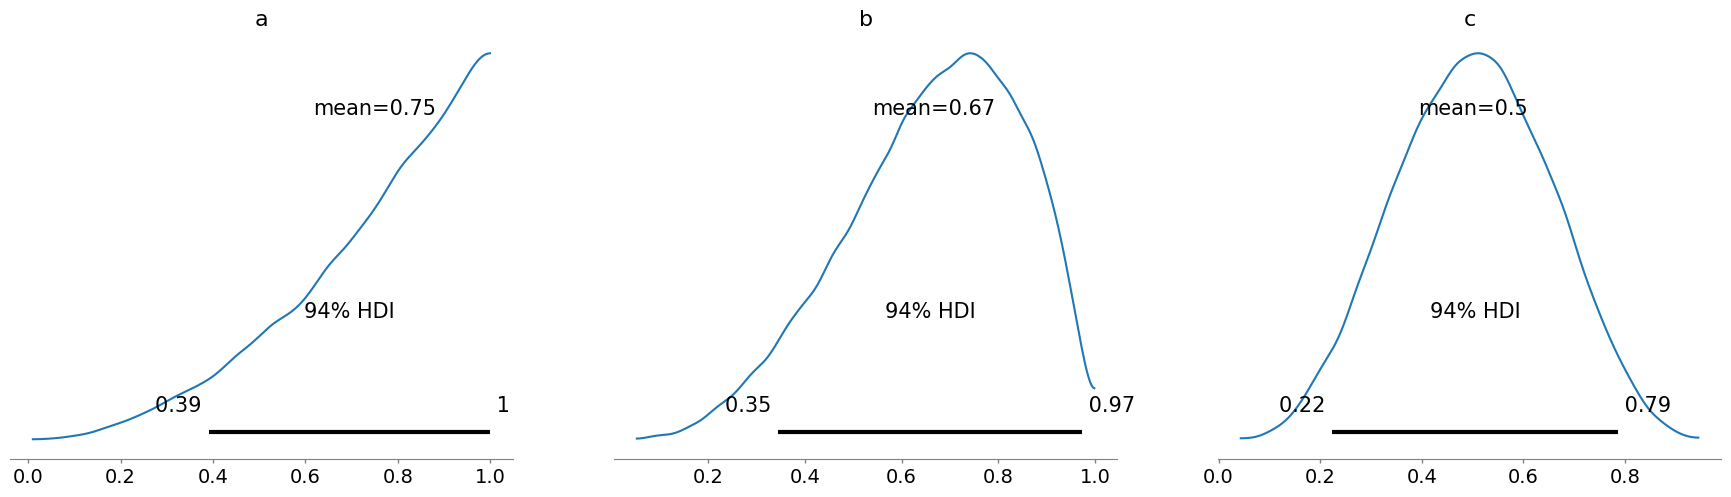

In [11]:
az.plot_posterior(samples)
